In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.head())

        City Country  PM2.5  PM10  NO2     O3  SO2     CO  NH3  \
0  abbeville      FR    4.7   8.8  4.7   36.8  0.8  210.3  1.3   
1     acarau      BR    2.1   9.6  0.2   52.2  0.1  353.8  0.1   
2      agbor      NG   29.9  39.2  5.7    2.5  0.4  894.6  0.6   
3    al jawf      SA   11.1  39.2  1.0  101.6  1.7  193.6  0.5   
4  al qusayr      SY    7.9  10.0  4.7   40.8  2.5  210.3  2.7   

   MortalityRate_per_100k  
0                     4.1  
1                     9.6  
2                    29.6  
3                    33.5  
4                    26.6  


In [4]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    398 non-null    object 
 1   Country                 398 non-null    object 
 2   PM2.5                   398 non-null    float64
 3   PM10                    398 non-null    float64
 4   NO2                     398 non-null    float64
 5   O3                      398 non-null    float64
 6   SO2                     398 non-null    float64
 7   CO                      398 non-null    float64
 8   NH3                     398 non-null    float64
 9   MortalityRate_per_100k  398 non-null    float64
dtypes: float64(8), object(2)
memory usage: 31.2+ KB
None


In [5]:
# Get basic statistics of numerical columns
print(data.describe())

            PM2.5        PM10         NO2          O3         SO2  \
count  398.000000  398.000000  398.000000  398.000000  398.000000   
mean     8.782915   17.507035    2.967085   50.314573    1.503518   
std     22.475258   42.845481    6.392155   24.763310    3.679097   
min      0.500000    0.500000    0.000000    0.000000    0.000000   
25%      0.900000    1.525000    0.300000   33.375000    0.100000   
50%      2.200000    4.750000    0.800000   51.150000    0.300000   
75%      5.675000   11.000000    2.575000   65.625000    0.900000   
max    343.200000  434.700000   66.500000  111.600000   31.000000   

                CO         NH3  MortalityRate_per_100k  
count   398.000000  398.000000              398.000000  
mean    293.982161    0.885176               14.348995  
std     292.729313    2.454258                9.567895  
min     161.900000    0.000000                3.200000  
25%     213.600000    0.000000                5.700000  
50%     230.300000    0.200000      

In [6]:
# Check for missing values in the dataset
print(data.isnull().sum())

City                      0
Country                   0
PM2.5                     0
PM10                      0
NO2                       0
O3                        0
SO2                       0
CO                        0
NH3                       0
MortalityRate_per_100k    0
dtype: int64


In [8]:
# Calculate mean, median, mode, variance, and standard deviation for PM2.5 column
mean_pm25 = data['PM2.5'].mean()
median_pm25 = data['PM2.5'].median()
mode_pm25 = data['PM2.5'].mode()[0] 
variance_pm25 = data['PM2.5'].var()
std_dev_pm25 = data['PM2.5'].std()

print(f"Mean PM2.5: {mean_pm25}, Median PM2.5: {median_pm25}, Mode PM2.5: {mode_pm25}, Variance PM2.5: {variance_pm25}, Standard Deviation PM2.5: {std_dev_pm25}")


Mean PM2.5: 8.782914572864321, Median PM2.5: 2.2, Mode PM2.5: 0.5, Variance PM2.5: 505.1372388390312, Standard Deviation PM2.5: 22.475258370907135


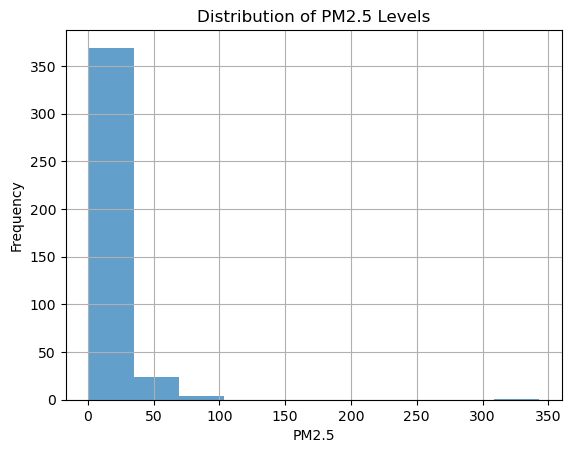

NormaltestResult(statistic=654.4194554072769, pvalue=7.845503730481972e-143)


In [7]:
# Plot a histogram for PM2.5
data['PM2.5'].hist(bins=10, alpha=0.7)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["PM2.5"]))

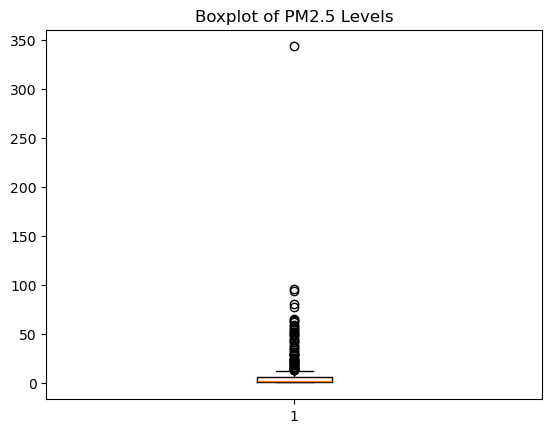

In [11]:
# Box plot for PM2.5
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of PM2.5 Levels')
ax1.boxplot(data['PM2.5'])
plt.show()

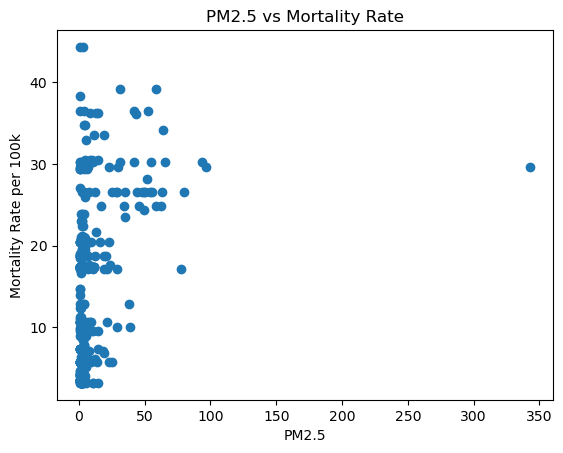

In [11]:
# Scatter plot between PM2.5 and Mortality Rate
plt.scatter(data['PM2.5'], data['MortalityRate_per_100k'])
plt.title('PM2.5 vs Mortality Rate')
plt.xlabel('PM2.5')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [8]:
z_scores = st.zscore(data['PM2.5'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

        City Country  PM2.5   PM10   NO2     O3   SO2      CO   NH3  \
57   bushehr      IR   77.3  137.1  12.5   97.3   5.5   534.1   0.6   
107     fada      NG   96.3  128.2  12.2    0.0   5.0  2082.8   9.6   
113   fuling      CN   80.2   84.6   8.9  107.3   8.9   814.4   2.1   
142   howrah      IN   93.4  120.3  31.5   16.4  25.8  1215.0   8.2   
196    lagos      NG  343.2  434.7  19.2    0.0   6.6  5020.1  12.4   

     MortalityRate_per_100k  
57                     17.1  
107                    29.6  
113                    26.6  
142                    30.2  
196                    29.6  


In [9]:
print(len(outliers))

5


In [10]:
from scipy.stats import pearsonr

# Correlation between PM2.5 and Mortality Rate
corr, p_value = pearsonr(data['PM2.5'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.3479249145194997, P-value: 9.088147738151992e-13


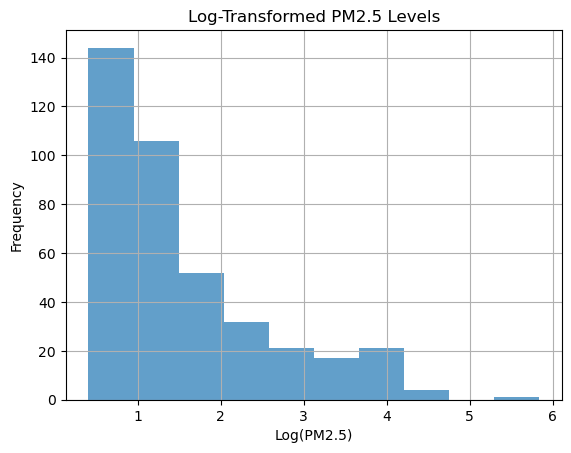

In [12]:
import numpy as np

# Apply log transformation (adding 1 to avoid log(0)) **For this part I asked chatGPT because I was not sure about the result. Golnaz**
data['log_PM2.5'] = np.log1p(data['PM2.5'])

# Plot histogram for log-transformed data
data['log_PM2.5'].hist(bins=10, alpha=0.7)
plt.title('Log-Transformed PM2.5 Levels')
plt.xlabel('Log(PM2.5)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Test the normality of the log-transformed data
normal_test = st.normaltest(data['log_PM2.5'])
print(normal_test)

NormaltestResult(statistic=70.73653811275355, pvalue=4.3627056705454576e-16)


In [14]:
corr, p_value = st.pearsonr(data['log_PM2.5'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: 0.42235132171968115, P-value: 1.1941173166885924e-18


A correlation of 0.42 indicates a moderate positive relationship between log-transformed PM2.5 levels and mortality rate. This suggests that, as PM2.5 levels increase (even after log transformation), there tends to be an increase in the mortality rate. However, the strength of the correlation is not extremely high, meaning other factors are likely influencing mortality rates as well.

Also the p-value is extremely small (far below the threshold of 0.05), which means that the relationship between log(PM2.5) and mortality rate is statistically significant. We can confidently reject the null hypothesis and conclude that there is a statistically significant correlation between PM2.5 levels and mortality rates.

In [17]:
# Calculate mean, median, mode, variance, and standard deviation for PM10 column
mean_pm10 = data['PM10'].mean()
median_pm10 = data['PM10'].median()
mode_pm10 = data['PM10'].mode()[0] 
variance_pm10 = data['PM10'].var()
std_dev_pm10 = data['PM10'].std()

print(f"Mean PM10: {mean_pm10}, Median PM10: {median_pm10}, Mode PM10: {mode_pm10}, Variance PM10: {variance_pm10}, Standard Deviation PM10: {std_dev_pm10}")


Mean PM10: 17.507035175879395, Median PM10: 4.75, Mode PM10: 0.5, Variance PM10: 1835.7352652430923, Standard Deviation PM10: 42.845481269826955


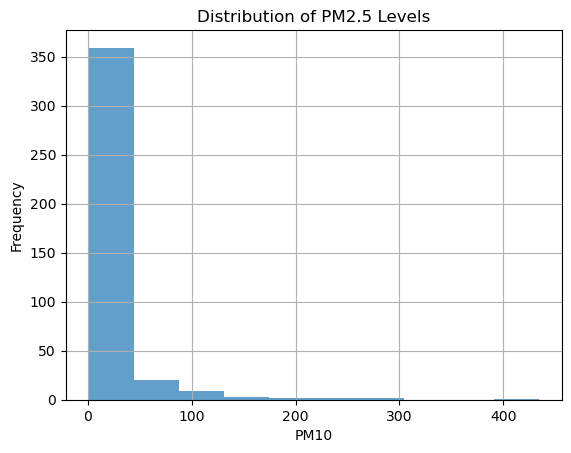

NormaltestResult(statistic=452.27081454575614, pvalue=6.175049715238869e-99)


In [18]:
# Plot a histogram for PM10
data['PM10'].hist(bins=10, alpha=0.7)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()
print(st.normaltest(data["PM10"]))

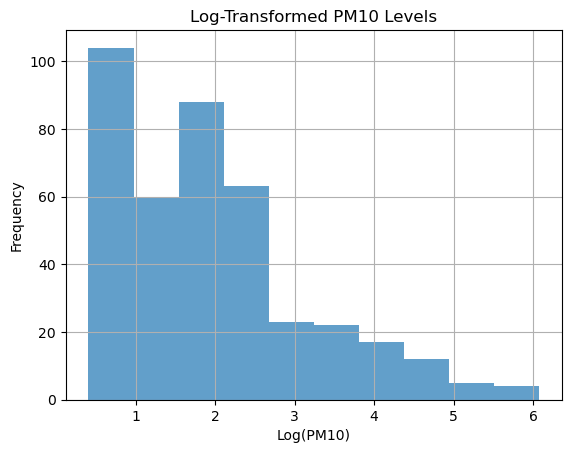

In [19]:
# Apply log transformation (adding 1 to avoid log(0)) **For this part I asked chatGPT because I was not sure about the result. Golnaz**
data['log_PM10'] = np.log1p(data['PM10'])

# Plot histogram for log-transformed data
data['log_PM10'].hist(bins=10, alpha=0.7)
plt.title('Log-Transformed PM10 Levels')
plt.xlabel('Log(PM10)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Test the normality of the log-transformed data
normal_test = st.normaltest(data['log_PM10'])
print(normal_test)

NormaltestResult(statistic=47.29702225786913, pvalue=5.3651530008078053e-11)


In [21]:
corr, p_value = st.pearsonr(data['log_PM10'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.38393327125682997, P-value: 1.9932397137394757e-15


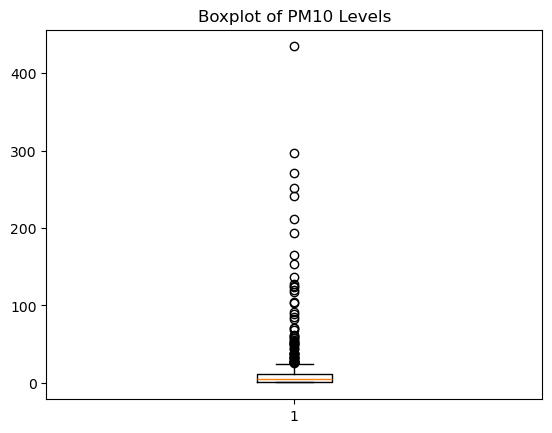

In [24]:
# Box plot for PM10
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of PM10 Levels')
ax1.boxplot(data['PM10'])
plt.show()

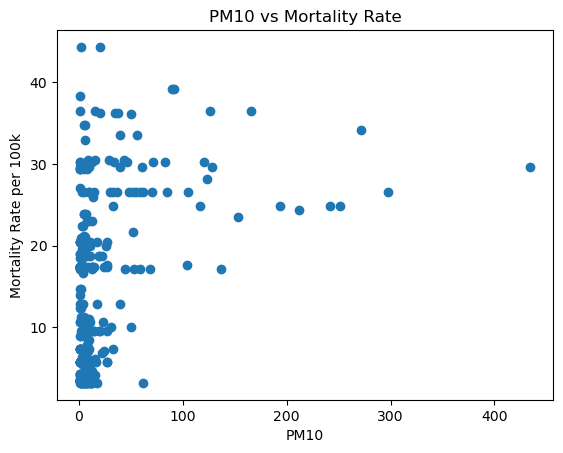

In [25]:
# Scatter plot between PM10 and Mortality Rate
plt.scatter(data['PM10'], data['MortalityRate_per_100k'])
plt.title('PM10 vs Mortality Rate')
plt.xlabel('PM10')
plt.ylabel('Mortality Rate per 100k')
plt.show()

In [26]:
z_scores = st.zscore(data['PM10'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print(outliers)

             City Country  PM2.5   PM10   NO2    O3  SO2      CO   NH3  \
5        alaghsas      NE   63.9  271.8   0.0  53.6  0.0   196.9   0.0   
23           ataq      YE   42.1  165.7   1.0  55.8  1.1   203.6   0.2   
129          hami      CN   54.4  297.4   3.4  68.0  1.1   208.6   1.5   
166         kayar      SN   35.3  153.3   3.8  87.3  3.9   413.9   3.1   
189         kutum      SD   45.3  193.7   0.1  61.5  0.2   171.9   0.0   
196         lagos      NG  343.2  434.7  19.2   0.0  6.6  5020.1  12.4   
318        shendi      SD   58.6  241.4   0.3  61.5  0.7   188.6   0.2   
339     taoudenni      ML   49.4  211.9   0.0  43.3  0.0   198.6   0.0   
360  umm kaddadah      SD   62.3  251.6   0.1  55.1  0.3   175.2   0.0   

     MortalityRate_per_100k  log_PM2.5  log_PM10  
5                      34.1   4.172848  5.608739  
23                     36.5   3.763523  5.116196  
129                    26.6   4.014580  5.698435  
166                    23.5   3.591818  5.038899  
189 

In [27]:
print(len(outliers))

9


In [28]:
# Correlation between PM10 and Mortality Rate
corr, p_value = pearsonr(data['PM10'], data['MortalityRate_per_100k'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.37451934156916955, P-value: 1.0644194820719793e-14


The correlation coefficient between PM10 and mortality rate is around 0.38. This indicates a moderate positive relationship: as PM10 levels increase, the mortality rate tends to increase as well. However, this is not a very strong correlation, meaning that PM10 contributes to increased mortality but is not the only factor at play.

The p-value is very small, indicating that the correlation between PM10 levels and mortality is statistically significant. This suggests that the relationship is unlikely to have occurred by chance and there is strong evidence that higher PM10 levels contribute to higher mortality rates.